In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sns.set_style("whitegrid")

In [3]:
names={"cerrado":"Cerrado","oli2msi":"OLI2MSI", "sent_nicfi":"SENT-NICFI", "wdsr":"WDSR","rcan":"RCAN","sr_ucmerced":"UC Merced","so2sat":"So2Sat"}
def rename_cols(x):
    return names[x.dataset], names[x.model], x.n_res, names[x.pretrained]



In [4]:
df_params=pd.read_csv("/data1/s1620444/results/autosr/autosr_chosen_params.csv",header=0)
df_params = df_params.apply(rename_cols,axis=1,result_type="expand")
df_params.rename(columns={0:"Dataset",1:"Model",2:"N_res",3:"Pretrained on"},inplace=True)
df_params

,Dataset,Model,N_res,Pretrained on
0,Cerrado,WDSR,20,UC Merced
1,Cerrado,WDSR,24,UC Merced
2,Cerrado,RCAN,12,UC Merced
3,Cerrado,RCAN,16,UC Merced
4,Cerrado,RCAN,20,UC Merced
5,OLI2MSI,RCAN,20,Cerrado
6,OLI2MSI,WDSR,34,Cerrado
7,OLI2MSI,WDSR,36,Cerrado
8,OLI2MSI,RCAN,16,UC Merced
9,OLI2MSI,RCAN,12,Cerrado


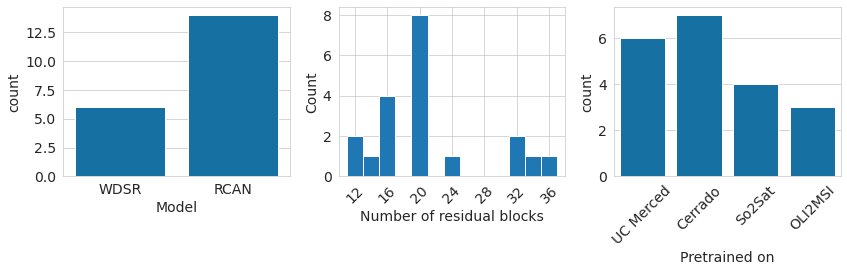

In [8]:
plt.rcParams.update({'font.size': 14})
fig,ax=plt.subplots(1,3,figsize=(12,4))
sns.countplot(x="Model",data=df_params,ax=ax[0],color="#0077b9")

bins = np.arange(12,39,2) - 1
ax[1].hist(df_params["N_res"], bins)
ax[1].set_xticks(range(12,39,4))
ax[1].set_xlim([10, 38])
ax[1].set_ylabel("Count")
ax[1].set_xlabel("Number of residual blocks")
for tick in ax[1].get_xticklabels():
    tick.set_rotation(45)
# sns.countplot(x="N_res",data=df_params,ax=ax[1],color="#0077b9")
sns.countplot(x="Pretrained on", data=df_params,ax=ax[2],color="#0077b9")
for tick in ax[2].get_xticklabels():
    tick.set_rotation(45)
plt.tight_layout()
plt.savefig("/data1/s1620444/plots/chosen_params.pdf")
plt.show()

In [10]:
df_params[["Model","N_res","Pretrained on"]].groupby(["Model","N_res","Pretrained on"],as_index=False).size().sort_values(by="size",ascending=False)

,Model,N_res,Pretrained on,size
3,RCAN,16,So2Sat,2
4,RCAN,16,UC Merced,2
5,RCAN,20,Cerrado,2
6,RCAN,20,OLI2MSI,2
7,RCAN,20,So2Sat,2
0,RCAN,12,Cerrado,1
1,RCAN,12,UC Merced,1
2,RCAN,14,Cerrado,1
8,RCAN,20,UC Merced,1
9,WDSR,20,UC Merced,1


In [11]:
df_params[["Model","N_res"]].groupby(["Model","N_res"],as_index=False).size().sort_values(by="size",ascending=False)

,Model,N_res,size
3,RCAN,20,7
2,RCAN,16,4
0,RCAN,12,2
6,WDSR,32,2
1,RCAN,14,1
4,WDSR,20,1
5,WDSR,24,1
7,WDSR,34,1
8,WDSR,36,1


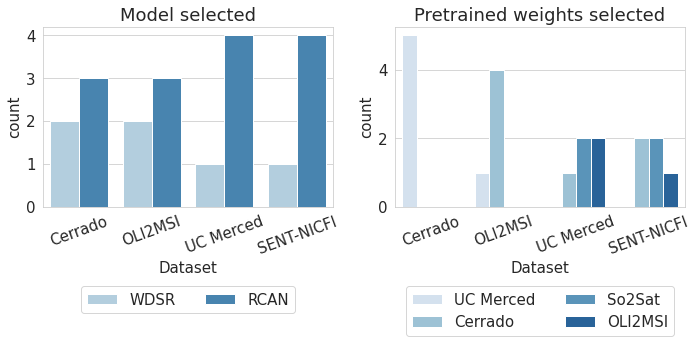

In [10]:

fig,ax=plt.subplots(1,2,figsize=(10,5))
sns.countplot(data=df_params,x="Dataset",hue="Model",ax=ax[0],palette="Blues")
# sns.distplot(data=df_params,x="Dataset",y="N_res",ax=ax[1])
# Shrink current axis's height by 10% on the bottom
box = ax[0].get_position()
ax[0].set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
                 
for tick in ax[0].get_xticklabels():
    tick.set_rotation(20)

# Put a legend below current axis
ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.4),
          fancybox=True, ncol=5)
ax[0].set_title("Model selected")
sns.countplot(data=df_params,x="Dataset",hue="Pretrained on",ax=ax[1],palette="Blues")
# Shrink current axis's height by 10% on the bottom
box = ax[1].get_position()
ax[1].set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])
for tick in ax[1].get_xticklabels():
    tick.set_rotation(20)

ax[1].set_title("Pretrained weights selected")
# Put a legend below current axis
ax[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.4),
          fancybox=True, ncol=2)
plt.tight_layout()
plt.savefig("/data1/s1620444/plots/model_pretrained_selected.pdf")
plt.show()

In [80]:
df_params.loc[df_params.Dataset=="Cerrado"]

,Dataset,Model,N_res,Pretrained on
0,Cerrado,WDSR,20,UC Merced
1,Cerrado,WDSR,24,UC Merced
2,Cerrado,RCAN,12,UC Merced
3,Cerrado,RCAN,16,UC Merced
4,Cerrado,RCAN,20,UC Merced


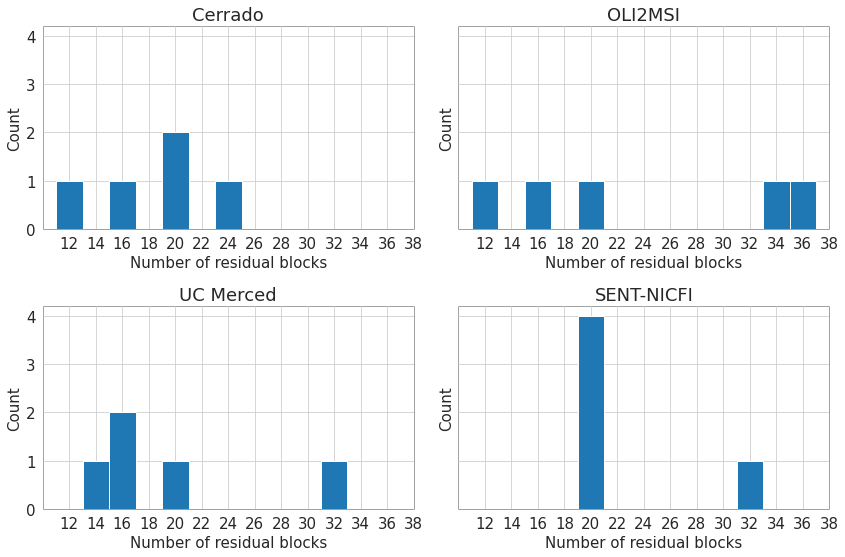

In [6]:
plt.rcParams.update({'font.size': 15})
fig,ax=plt.subplots(2,2,figsize=(12,8),sharey=True)

for dataset,ax in zip(["Cerrado","OLI2MSI","UC Merced","SENT-NICFI"],ax.flat):
    ax.patch.set_edgecolor('black')  
    ax.patch.set_linewidth('1')

    bins = np.arange(12,39,2) - 1
    ax.hist(df_params.loc[df_params.Dataset==dataset]["N_res"], bins)
    ax.set_xticks(range(12,39,2))
    ax.set_xlim([10, 38])
    ax.set_title(dataset)
    ax.set_ylabel("Count")
    ax.set_xlabel("Number of residual blocks")
plt.tight_layout()
plt.savefig("/data1/s1620444/plots/n_rg_per_dataset.pdf")
plt.show()

In [65]:
df_params.loc[df_params.Dataset=="Cerrado"].N_res

0    20
1    24
2    12
3    16
4    20
Name: N_res, dtype: int64